In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bereinigte Datei laden
df = pd.read_csv("book_data_clean.csv", sep=";", encoding="utf-8")

# Empfohlene Spaltenreihenfolge
neue_reihenfolge = [
    "Publishing_Year",
    "Language_Code",
    "Author_Rating",
    "Average_Rating",
    "Rating_Count",
    "Gross_Sales_EUR",
    "Publisher_Revenue_EUR",
    "Genre",
    "Publisher",
    "Author",
    "Book_Name",
    "Adapted_to_Film"
]

# Spalten im DataFrame neu anordnen und nach JAhr sortieren
df = df[neue_reihenfolge].sort_values("Publishing_Year").reset_index(drop=True)
df

,Publishing_Year,Language_Code,Author_Rating,Average_Rating,Rating_Count,Gross_Sales_EUR,Publisher_Revenue_EUR,Genre,Publisher,Author,Book_Name,Adapted_to_Film
0,1925,en,Intermediate,3.98,131856,1.202850e+03,0.00,Fiction,"Amazon Digital Services, Inc,","Franz Kafka, Edwin Muir, Willa Muir, Max Brod",Der ProzeÃÅ¸,1.0
1,1925,en,Intermediate,3.78,136327,1.174100e+03,704.46,Historical Fiction,"Amazon Digital Services, Inc,","Virginia Woolf, Maureen Howard",Mrs Dalloway,1.0
2,1926,en,Excellent,4.20,71354,8.422400e+05,505344.00,Mystery,"Amazon Digital Services, Inc,",Agatha Christie,The Murder of Roger Ackroyd,0.0
3,1927,en,Excellent,4.11,205807,8.333300e+05,499998.00,Science Fiction,"Amazon Digital Services, Inc,","Hermann Hesse, Basil Creighton",Der Steppenwolf,0.0
4,1927,en,Intermediate,3.76,83066,1.144040e+06,686424.00,Historical Fiction,Macmillan,Virginia Woolf,To The Lighthouse,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2023,fr,Intermediate,4.10,315000,1.200000e+06,600000.00,Fantasy,"S, Fischer Verlag",Christelle Dabos,Die Spiegelreisende,0.0
1024,2023,fr,Novice,4.29,8683,7.000000e+08,10000000.00,Fantasy,LArt de perdre in Frankreich,Baptiste Andrea,Veiller sur elle,1.0
1025,2023,en,Famous,3.80,413924,3.000000e+06,1200000.00,Memoir,Knopf,Prince Harry,Spare,1.0
1026,2024,en,Novice,4.24,25000,1.800000e+06,800000.00,Fiction,Penguin,Bonnie Garmus,Lessons in Chemistry,0.0


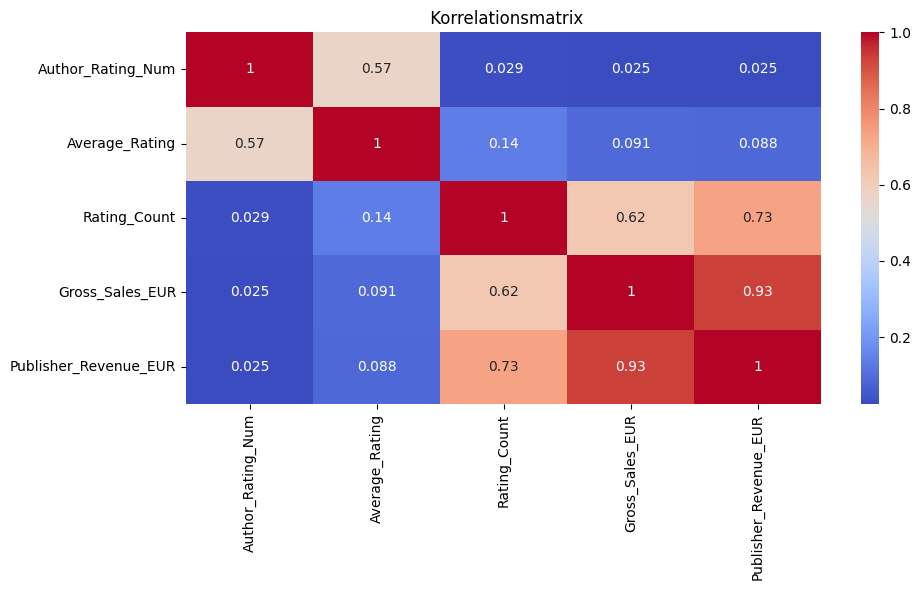

'  Interpretation der Matrix:\n Starke positive Korrelationen:\nGross_Sales_EUR ↔ Publisher_Revenue_EUR: 0.93\n→ Logisch: Wenn ein Buch hohe Umsätze hat, hat der Verlag entsprechend hohe Einnahmen.\n\nPublisher_Revenue_EUR ↔ Rating_Count: 0.73\n→ Bücher mit mehr Bewertungen bringen tendenziell mehr Einnahmen.\n\nGross_Sales_EUR ↔ Rating_Count: 0.62\n→ Mehr Bewertungen deuten oft auf höhere Verkäufe hin.\n\n Mittlere Korrelation:\nAverage_Rating ↔ Author_Rating_Num: 0.57\n→ Besser bewertete Autoren schreiben tendenziell besser bewertete Bücher.\n\n Schwache oder keine Korrelation:\nAverage_Rating ↔ Gross_Sales_EUR: 0.09\n→ Bewertung eines Buches hat kaum Einfluss auf den Umsatz.\n\nAuthor_Rating_Num ↔ Sales/Revenue/Rating_Count: < 0.03\n→ Die subjektive Autorbewertung hängt kaum mit Verkäufen oder Popularität zusammen.'

In [5]:
#   Korrelationen

rating_map = {
    "Novice": 1,
    "Intermediate": 2,
    "Famous": 3,
    "Excellent": 4
}
df["Author_Rating_Num"] = df["Author_Rating"].map(rating_map)

plt.figure(figsize=(10, 6))
sns.heatmap(
    df[
        ["Author_Rating_Num","Average_Rating", "Rating_Count", "Gross_Sales_EUR", "Publisher_Revenue_EUR"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title(" Korrelationsmatrix")
plt.tight_layout()
plt.show()
'''  Interpretation der Matrix:
 Starke positive Korrelationen:
Gross_Sales_EUR ↔ Publisher_Revenue_EUR: 0.93
→ Logisch: Wenn ein Buch hohe Umsätze hat, hat der Verlag entsprechend hohe Einnahmen.

Publisher_Revenue_EUR ↔ Rating_Count: 0.73
→ Bücher mit mehr Bewertungen bringen tendenziell mehr Einnahmen.

Gross_Sales_EUR ↔ Rating_Count: 0.62
→ Mehr Bewertungen deuten oft auf höhere Verkäufe hin.

 Mittlere Korrelation:
Average_Rating ↔ Author_Rating_Num: 0.57
→ Besser bewertete Autoren schreiben tendenziell besser bewertete Bücher.

 Schwache oder keine Korrelation:
Average_Rating ↔ Gross_Sales_EUR: 0.09
→ Bewertung eines Buches hat kaum Einfluss auf den Umsatz.

Author_Rating_Num ↔ Sales/Revenue/Rating_Count: < 0.03
→ Die subjektive Autorbewertung hängt kaum mit Verkäufen oder Popularität zusammen.'''

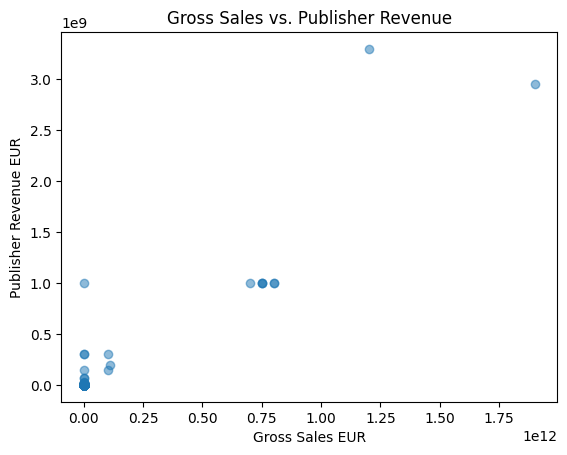

In [4]:
plt.scatter(df['Gross_Sales_EUR'], df['Publisher_Revenue_EUR'], alpha=0.5)
plt.xlabel('Gross Sales EUR')
plt.ylabel('Publisher Revenue EUR')
plt.title('Gross Sales vs. Publisher Revenue')
plt.show()

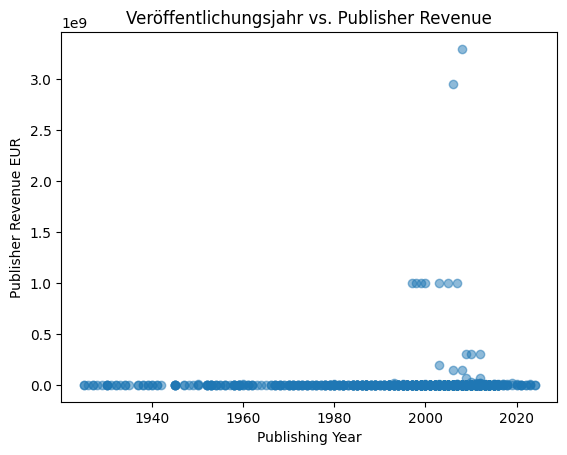

In [17]:
plt.scatter(df['Publishing_Year'], df['Publisher_Revenue_EUR'], alpha=0.5)
plt.xlabel('Publishing Year')
plt.ylabel('Publisher Revenue EUR')
plt.title('Veröffentlichungsjahr vs. Publisher Revenue')
plt.show()

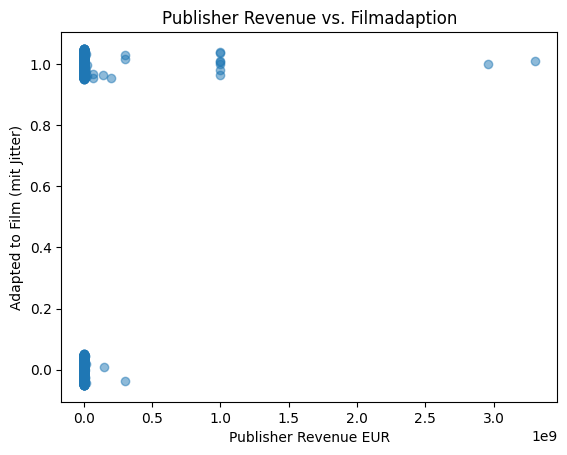

In [12]:
import numpy as np

y_jitter = df['Adapted_to_Film'] + np.random.uniform(-0.05, 0.05, size=len(df))

plt.scatter(df['Publisher_Revenue_EUR'], y_jitter, alpha=0.5)
plt.xlabel('Publisher Revenue EUR')
plt.ylabel('Adapted to Film (mit Jitter)')
plt.title('Publisher Revenue vs. Filmadaption')
plt.show()

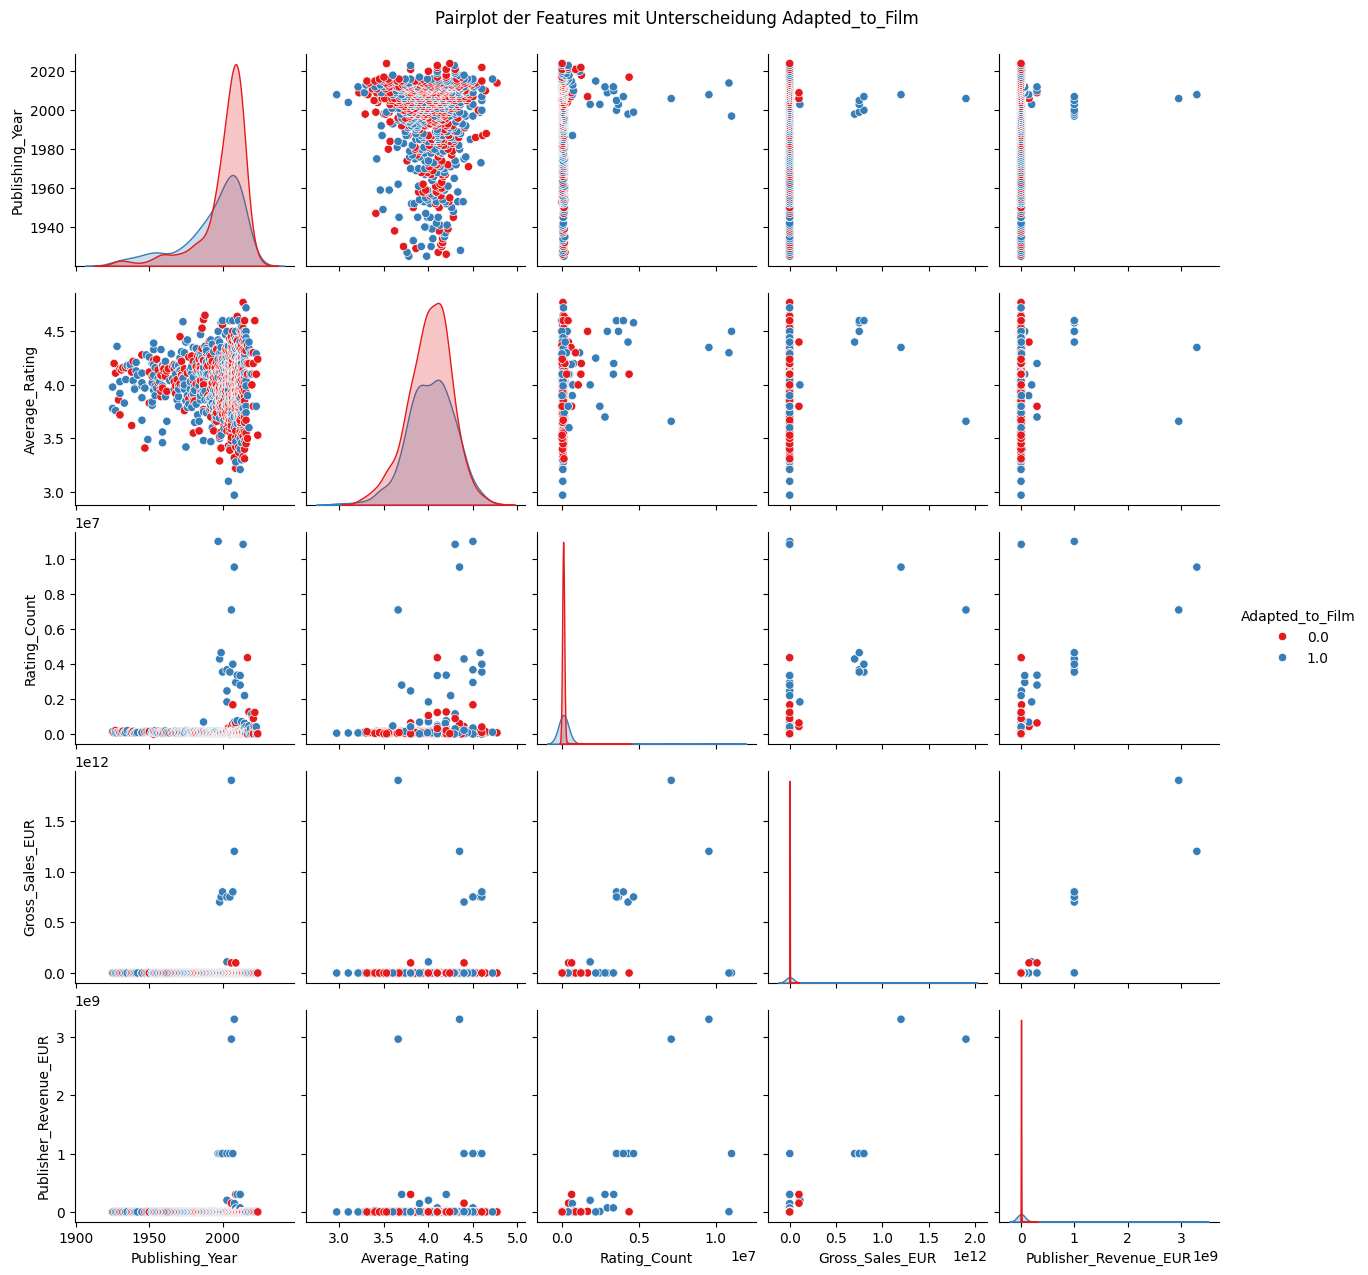

'Mögliche Schlussfolgerungen\nUmsatzstarke Bücher werden häufiger verfilmt. Das ist intuitiv: Bücher mit hohen Publisher_Revenue_EUR und Gross_Sales_EUR haben wahrscheinlich mehr Aufmerksamkeit und Budget für eine Verfilmung.\n\nBewertung spielt eine gewisse Rolle, aber weniger stark als der kommerzielle Erfolg.\n\nAlter des Buches (Publishing_Year) scheint weniger entscheidend zu sein für die Frage, ob es verfilmt wird.\n\nEs lohnt sich, weitere Features zu prüfen oder z.B. mit ML-Modellen zu untersuchen, welche Faktoren wirklich stark adaptierte Bücher vorhersagen.'

In [6]:
# Wähle relevante numerische Features aus, inkl. der Zielvariable
features = ['Publishing_Year', 'Average_Rating', 'Rating_Count', 'Gross_Sales_EUR', 'Publisher_Revenue_EUR', 'Adapted_to_Film']

# Erstelle Pairplot mit Farbhervorhebung nach Filmadaption
sns.pairplot(df[features], hue='Adapted_to_Film', diag_kind='kde', palette='Set1')

plt.suptitle('Pairplot der Features mit Unterscheidung Adapted_to_Film', y=1.02)
plt.show()
"""Mögliche Schlussfolgerungen
Umsatzstarke Bücher werden häufiger verfilmt. Das ist intuitiv: Bücher mit hohen Publisher_Revenue_EUR und Gross_Sales_EUR haben wahrscheinlich mehr Aufmerksamkeit und Budget für eine Verfilmung.

Bewertung spielt eine gewisse Rolle, aber weniger stark als der kommerzielle Erfolg.

Alter des Buches (Publishing_Year) scheint weniger entscheidend zu sein für die Frage, ob es verfilmt wird.

Es lohnt sich, weitere Features zu prüfen oder z.B. mit ML-Modellen zu untersuchen, welche Faktoren wirklich stark adaptierte Bücher vorhersagen."""

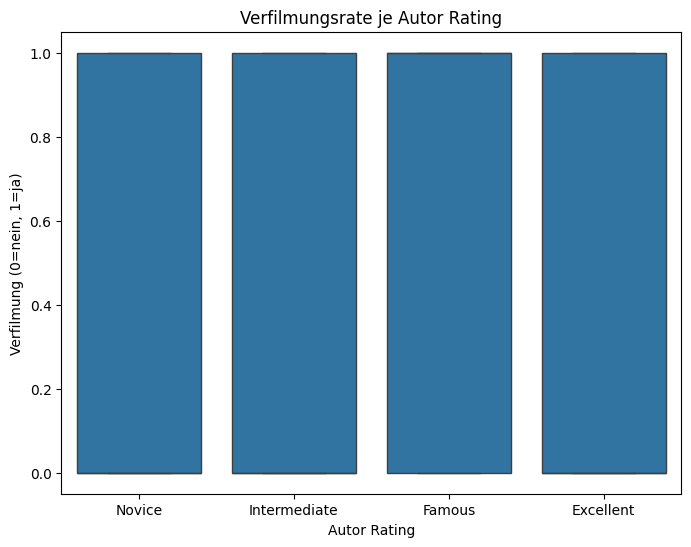

Author_Rating
Excellent       0.349254
Famous          0.586207
Intermediate    0.434783
Novice          0.419355
Name: Adapted_to_Film, dtype: float64


In [22]:
rating_map = {
    "Novice": 1,
    "Intermediate": 2,
    "Famous": 3,
    "Excellent": 4
}
df["Author_Rating_Num"] = df["Author_Rating"].map(rating_map)
# Boxplot: Verteilung Verfilmung nach Author Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x="Author_Rating_Num", y="Adapted_to_Film", data=df)
plt.xticks(ticks=[0,1,2,3], labels=["Novice", "Intermediate", "Famous", "Excellent"])
plt.xlabel("Autor Rating")
plt.ylabel("Verfilmung (0=nein, 1=ja)")
plt.title("Verfilmungsrate je Autor Rating")
plt.show()
verfilmungsrate = df.groupby("Author_Rating")["Adapted_to_Film"].mean()
print(verfilmungsrate)

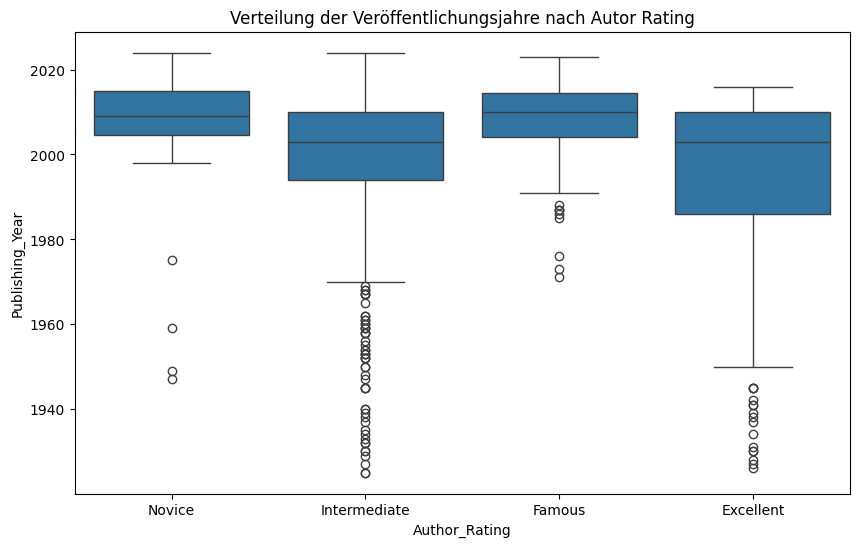

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Author_Rating", y="Publishing_Year", data=df, order=["Novice", "Intermediate", "Famous", "Excellent"])
plt.title("Verteilung der Veröffentlichungsjahre nach Autor Rating")
plt.show()

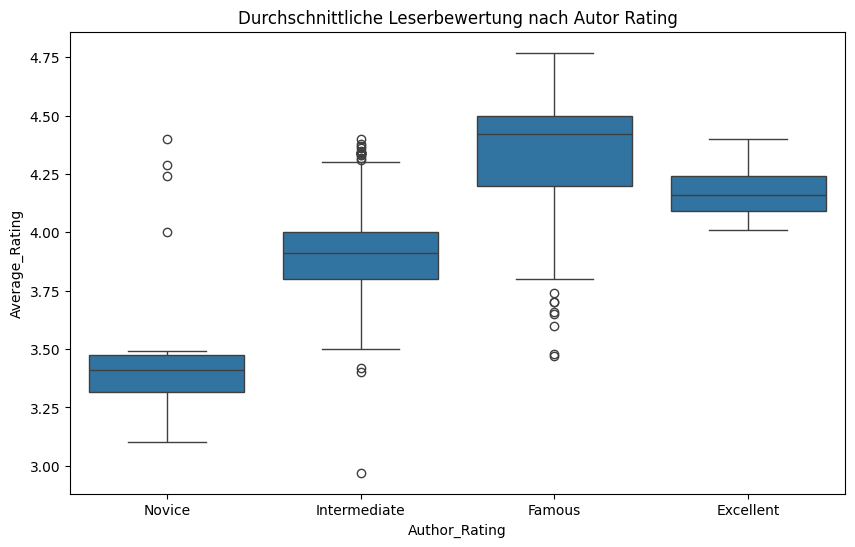

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Author_Rating", y="Average_Rating", data=df, order=["Novice", "Intermediate", "Famous", "Excellent"])
plt.title("Durchschnittliche Leserbewertung nach Autor Rating")
plt.show()

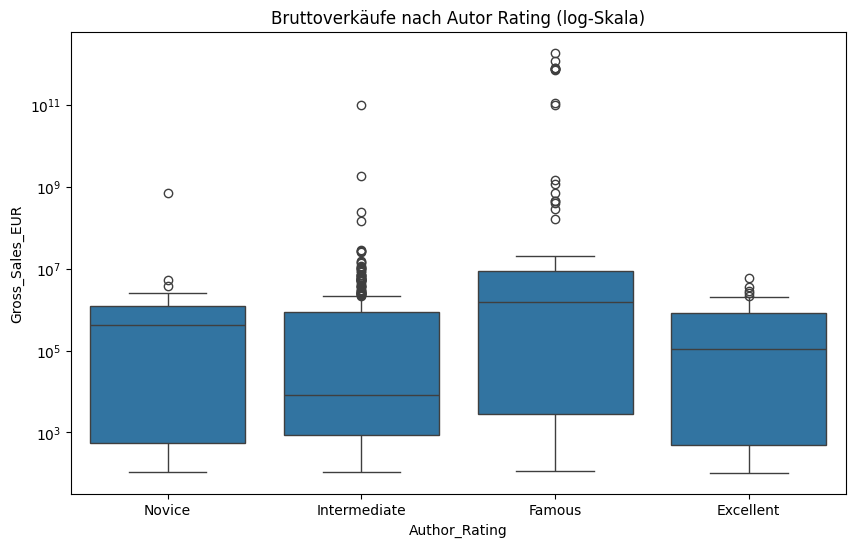

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Author_Rating", y="Gross_Sales_EUR", data=df, order=["Novice", "Intermediate", "Famous", "Excellent"])
plt.yscale('log')  # Da Verkäufe oft stark verteilt sind, hilft Log-Skala
plt.title("Bruttoverkäufe nach Autor Rating (log-Skala)")
plt.show()

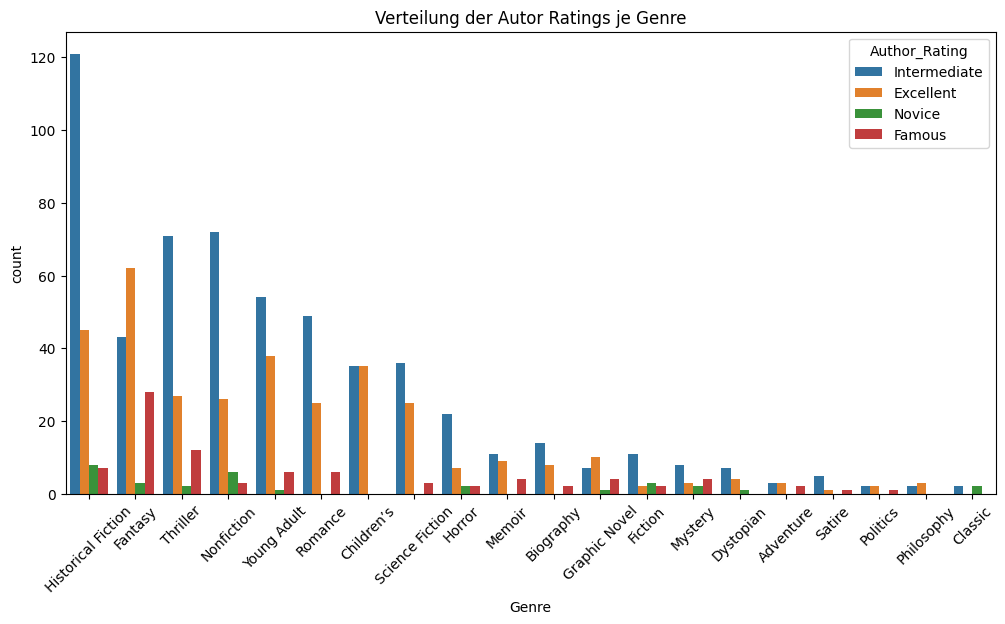

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x="Genre", hue="Author_Rating", data=df, order=df["Genre"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung der Autor Ratings je Genre")
plt.show()

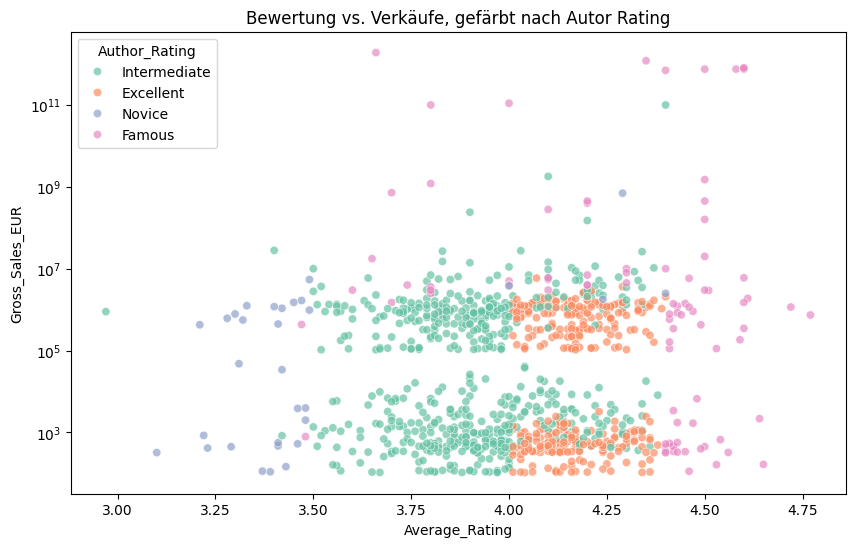

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Average_Rating", y="Gross_Sales_EUR", hue="Author_Rating", data=df, palette="Set2", alpha=0.7)
plt.yscale('log')
plt.title("Bewertung vs. Verkäufe, gefärbt nach Autor Rating")
plt.show()

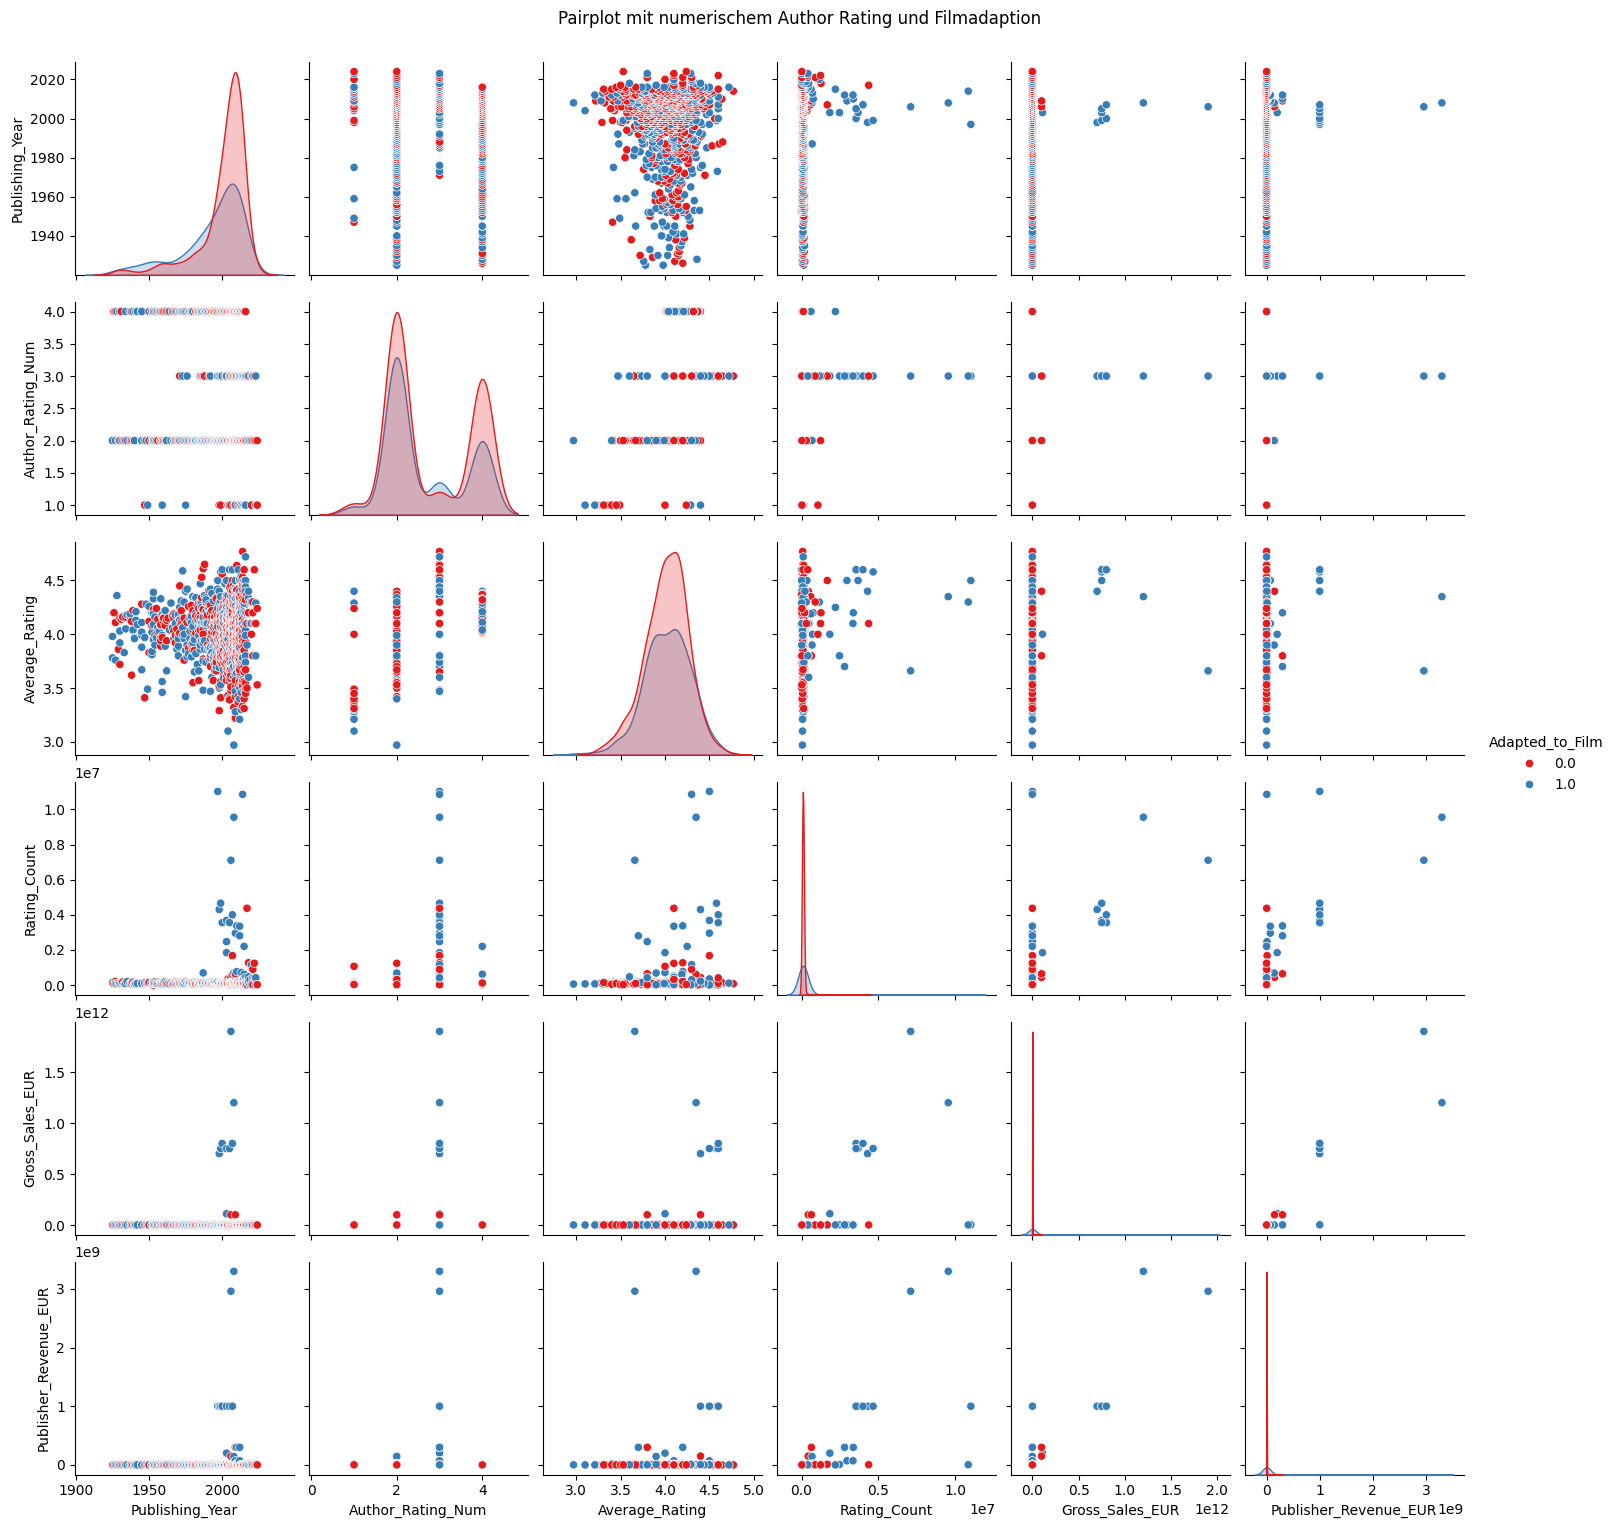

In [13]:
# Wähle relevante numerische Features aus, inkl. der Zielvariable
rating_map = {
    "Novice": 1,
    "Intermediate": 2,
    "Famous": 3,
    "Excellent": 4
}

# Autor_Rating numerisch kodieren
df['Author_Rating_Num'] = df['Author_Rating'].map(rating_map)

# Neue Featureliste mit numerischem Author_Rating
features = ['Publishing_Year', 'Author_Rating_Num', 'Average_Rating', 'Rating_Count', 'Gross_Sales_EUR', 'Publisher_Revenue_EUR', 'Adapted_to_Film']

# Pairplot (Author_Rating ist jetzt numerisch)
sns.pairplot(df[features], hue='Adapted_to_Film', diag_kind='kde', palette='Set1')

plt.suptitle('Pairplot mit numerischem Author Rating und Filmadaption', y=1.02)
plt.show()


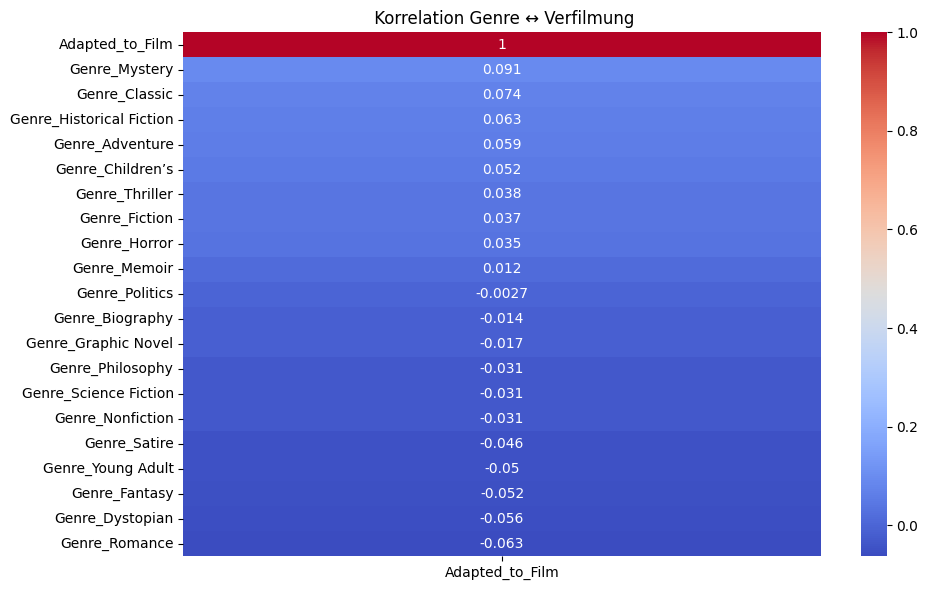

In [14]:
df_dummies = pd.get_dummies(df, columns=['Genre', 'Language_Code'], drop_first=False)
cor_df = df_dummies[[col for col in df_dummies.columns if col.startswith('Genre_')] + ['Adapted_to_Film']]
corr = cor_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Adapted_to_Film']].sort_values(by='Adapted_to_Film', ascending=False), annot=True, cmap='coolwarm')
plt.title(" Korrelation Genre ↔ Verfilmung")
plt.tight_layout()
plt.show()

C:\Users\evovtch\AppData\Local\Temp\ipykernel_8328\3431006148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_df.index, y='Avg_Gross_Sales', data=genre_sales_df, palette="viridis")


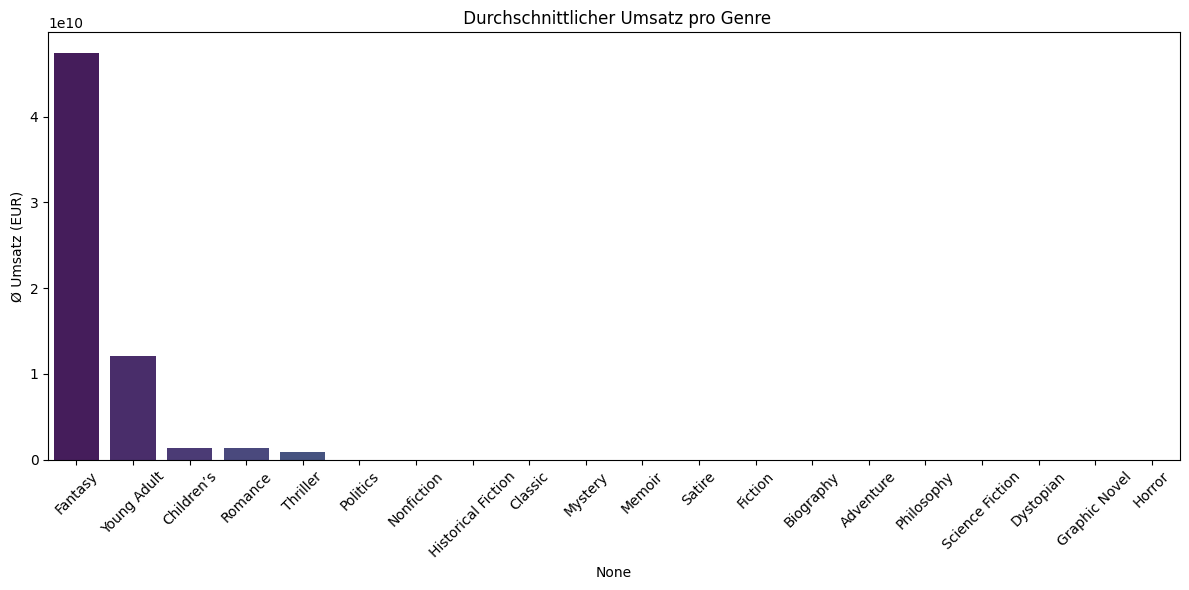

In [9]:
genre_cols = [col for col in df_dummies.columns if col.startswith('Genre_')]

genre_sales = {
    genre.replace('Genre_', ''): df_dummies[genre].dot(df['Gross_Sales_EUR']) / df_dummies[genre].sum()
    for genre in genre_cols
}

# In DataFrame umwandeln und sortieren
genre_sales_df = pd.DataFrame.from_dict(genre_sales, orient='index', columns=['Avg_Gross_Sales']).sort_values(by='Avg_Gross_Sales', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales_df.index, y='Avg_Gross_Sales', data=genre_sales_df, palette="viridis")
plt.xticks(rotation=45)
plt.title(' Durchschnittlicher Umsatz pro Genre')
plt.ylabel('Ø Umsatz (EUR)')
plt.tight_layout()
plt.show()


C:\Users\evovtch\AppData\Local\Temp\ipykernel_8328\3463233345.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Publishing_Year'],kde=True)


<Axes: xlabel='Publishing_Year', ylabel='Density'>

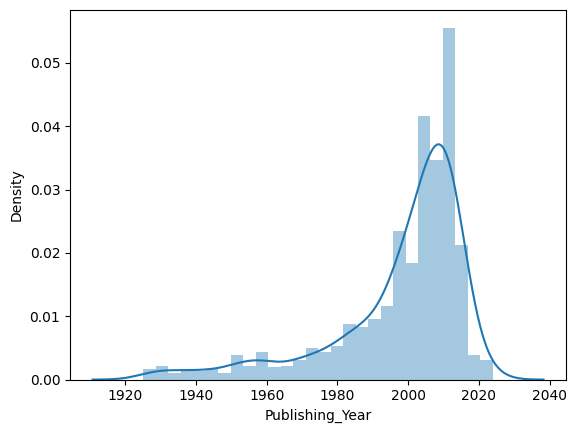

In [15]:
neue_reihenfolge = [
    "Publishing_Year",
    "Language_Code",
    "Author_Rating",
    "Average_Rating",
    "Rating_Count",
    "Gross_Sales_EUR",
    "Publisher_Revenue_EUR",
    "Genre",
    "Publisher",
    "Author",
    "Book_Name",
    "Adapted_to_Film"
]

sns.distplot(df['Publishing_Year'],kde=True)

C:\Users\evovtch\AppData\Local\Temp\ipykernel_10956\1158565131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Author_Rating_Num'],kde=True)


<Axes: xlabel='Author_Rating_Num', ylabel='Density'>

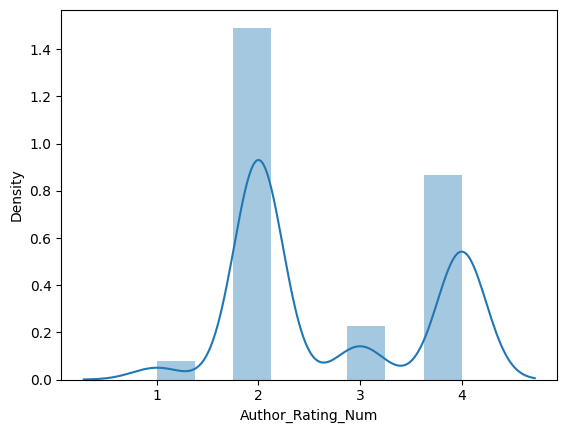

In [36]:
sns.distplot(df['Author_Rating_Num'],kde=True)

C:\Users\evovtch\AppData\Local\Temp\ipykernel_10956\3677269026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Average_Rating"],kde=True)


<Axes: xlabel='Average_Rating', ylabel='Density'>

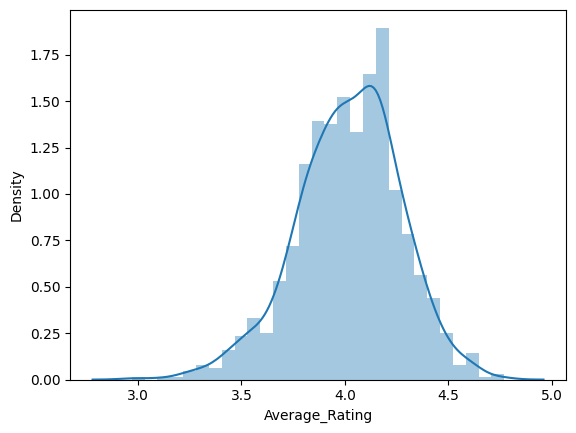

In [37]:
sns.distplot(df["Average_Rating"],kde=True)

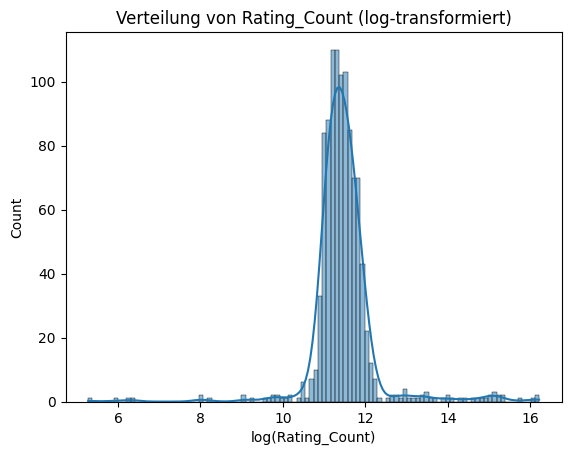

' Die meisten Werte bei Rating_Count (Anzahl der Bewertungen) liegen in einem relativ kleinen Bereich (z.\u202fB. 10.000–300.000), aber es gibt einige Ausreißer, die bei mehreren Millionen liegen.\n\n Dadurch ist der Großteil der Daten zusammengequetscht ganz links in der Grafik. Log-Transformation hilft, große Ausreißer abzuschwächen und die Verteilung sichtbar zu machen:'

In [16]:
df['Rating_Count_Log'] = np.log1p(df['Rating_Count'])

# Neue Verteilung anzeigen
sns.histplot(df['Rating_Count_Log'], kde=True)
plt.title("Verteilung von Rating_Count (log-transformiert)")
plt.xlabel("log(Rating_Count)")
plt.show()
""" Die meisten Werte bei Rating_Count (Anzahl der Bewertungen) liegen in einem relativ kleinen Bereich (z. B. 10.000–300.000), aber es gibt einige Ausreißer, die bei mehreren Millionen liegen.

 Dadurch ist der Großteil der Daten zusammengequetscht ganz links in der Grafik. Log-Transformation hilft, große Ausreißer abzuschwächen und die Verteilung sichtbar zu machen:"""

In [ ]:
sns.histplot(df["Gross_Sales_EUR"], kde=True)

<Axes: xlabel='Adapted_to_Film', ylabel='count'>

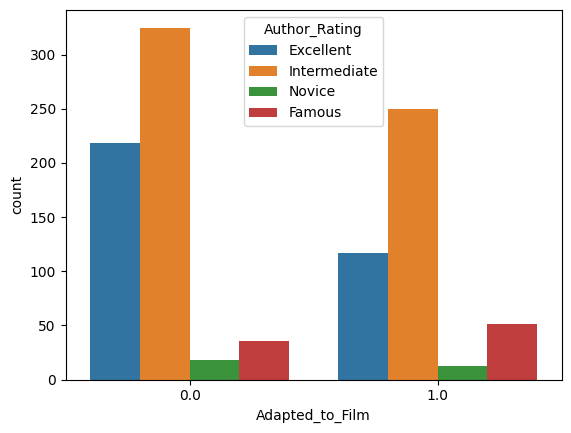

In [5]:
sns.countplot(x = 'Adapted_to_Film', hue = 'Author_Rating' ,data = df)

<Axes: xlabel='Adapted_to_Film', ylabel='count'>

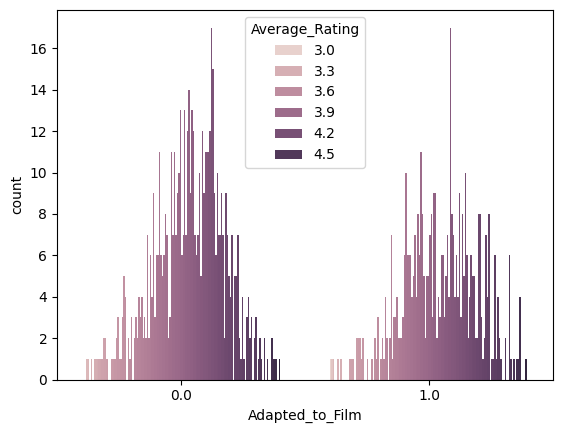

In [6]:
sns.countplot(x = 'Adapted_to_Film', hue = 'Average_Rating' ,data = df)

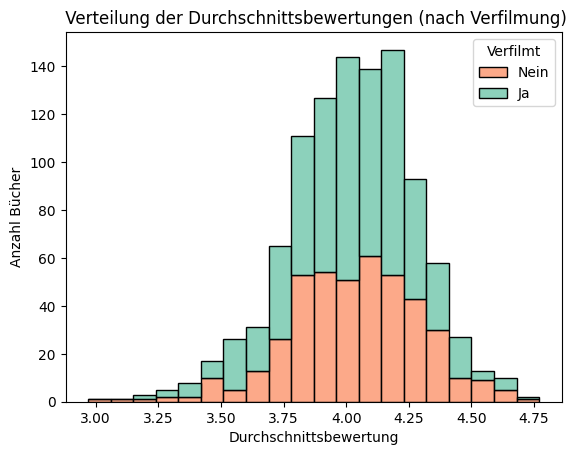

In [17]:
sns.histplot(data=df, x='Average_Rating', hue='Adapted_to_Film', multiple='stack', bins=20, palette='Set2')
plt.title(' Verteilung der Durchschnittsbewertungen (nach Verfilmung)')
plt.xlabel('Durchschnittsbewertung')
plt.ylabel('Anzahl Bücher')
plt.legend(title='Verfilmt', labels=['Nein', 'Ja'])
plt.show()

In [21]:
# Neue Spalte mit numerischem Autor-Rating
df['Author_Rating_Num'] = df['Author_Rating'].map(rating_map)

# Neue Featureliste inklusive Zielvariable
features = [
    'Publishing_Year',
    'Author_Rating_Num',
    'Average_Rating',
    'Rating_Count',
    'Gross_Sales_EUR',
    'Publisher_Revenue_EUR',
    'Adapted_to_Film'
]

# Ausgabe des neuen DataFrames mit nur den ausgewählten Features
df_num = df[features]

# Optional: Ausgabe anzeigen
print(df_num.head())
df_num

   Publishing_Year  Author_Rating_Num  Average_Rating  Rating_Count  \
0             1925                  2            3.98        131856   
1             1925                  2            3.78        136327   
2             1926                  4            4.20         71354   
3             1927                  4            4.11        205807   
4             1927                  2            3.76         83066   

   Gross_Sales_EUR  Publisher_Revenue_EUR  Adapted_to_Film  
0          1202.85                   0.00              1.0  
1          1174.10                 704.46              1.0  
2        842240.00              505344.00              0.0  
3        833330.00              499998.00              0.0  
4       1144040.00              686424.00              1.0  


,Publishing_Year,Author_Rating_Num,Average_Rating,Rating_Count,Gross_Sales_EUR,Publisher_Revenue_EUR,Adapted_to_Film
0,1925,2,3.98,131856,1.202850e+03,0.00,1.0
1,1925,2,3.78,136327,1.174100e+03,704.46,1.0
2,1926,4,4.20,71354,8.422400e+05,505344.00,0.0
3,1927,4,4.11,205807,8.333300e+05,499998.00,0.0
4,1927,2,3.76,83066,1.144040e+06,686424.00,1.0
...,...,...,...,...,...,...,...
1023,2023,2,4.10,315000,1.200000e+06,600000.00,0.0
1024,2023,1,4.29,8683,7.000000e+08,10000000.00,1.0
1025,2023,3,3.80,413924,3.000000e+06,1200000.00,1.0
1026,2024,1,4.24,25000,1.800000e+06,800000.00,0.0


In [27]:
# Genre als One-Hot-Encoding
df_num = df[features].copy()  # <- falls du df_num aus bestimmten Spalten erstellt hast
df_num['Genre'] = df['Genre']
df_encoded = pd.get_dummies(df, columns=['Genre'], drop_first=False)

# Kontrolle: Liste der neuen Genre-Spalten (20 Stück)
genre_columns = [col for col in df_encoded.columns if col.startswith('Genre_')]
print(f"Anzahl Genre-Spalten: {len(genre_columns)}")  # → sollte 20 sein

# Beispielauszug:
print(df_encoded[genre_columns].head())

# One-Hot-Encoding durchführen und Originalspalte Genre entfernen
df_encoded = pd.get_dummies(df_num, columns=['Genre'], drop_first=False)

# Kontrolle: Zeige neue Spaltennamen
print(df_encoded.columns)
df_encoded

Anzahl Genre-Spalten: 20
   Genre_Adventure  Genre_Biography  Genre_Children’s  Genre_Classic  \
0            False            False             False          False   
1            False            False             False          False   
2            False            False             False          False   
3            False            False             False          False   
4            False            False             False          False   

   Genre_Dystopian  Genre_Fantasy  Genre_Fiction  Genre_Graphic Novel  \
0            False          False           True                False   
1            False          False          False                False   
2            False          False          False                False   
3            False          False          False                False   
4            False          False          False                False   

   Genre_Historical Fiction  Genre_Horror  Genre_Memoir  Genre_Mystery  \
0                     False  

,Publishing_Year,Author_Rating_Num,Average_Rating,Rating_Count,Gross_Sales_EUR,Publisher_Revenue_EUR,Adapted_to_Film,Genre_Adventure,Genre_Biography,Genre_Children’s,...,Genre_Memoir,Genre_Mystery,Genre_Nonfiction,Genre_Philosophy,Genre_Politics,Genre_Romance,Genre_Satire,Genre_Science Fiction,Genre_Thriller,Genre_Young Adult
0,1925,2,3.98,131856,1.202850e+03,0.00,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1925,2,3.78,136327,1.174100e+03,704.46,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1926,4,4.20,71354,8.422400e+05,505344.00,0.0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1927,4,4.11,205807,8.333300e+05,499998.00,0.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1927,2,3.76,83066,1.144040e+06,686424.00,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2023,2,4.10,315000,1.200000e+06,600000.00,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1024,2023,1,4.29,8683,7.000000e+08,10000000.00,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1025,2023,3,3.80,413924,3.000000e+06,1200000.00,1.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1026,2024,1,4.24,25000,1.800000e+06,800000.00,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_encoded.to_csv("buchdaten_ml_ready.csv", index=False)